# Chapter 2: 퍼셉트론
---

##### 2.1 퍼셉트론이란?

* 신경망(딥러닝)의 기원이 되는 알고리즘
* 다수의 입력을 받아 하나의 신호를 출력
* 퍼셉트론 수식: 입력 신호와 가중치의 곱이 임계값을 넘으면 1, 그렇지 않으면 0을 출력   
$y = \begin{cases}0 (w_1x_1 + w_2x_2 \leq \Theta) \\ 1 (w_1x_1 + w_2x_2 > \Theta)\end{cases}$


##### 2.2 단순한 논리 회로

* AND 게이트나 NAND 게이트 등 다양한 논리 회로를 퍼셉트론으로 구현할 수 있다.
* 가령, AND 게이트의 경우는 $x_1$ 와 $x_2$가 모두 1일 때만 1을 출력해야 하기 때문에 $(w_1, w_2, \Theta)$ 를 $(0.5, 0.5, 0.9)$ 로 가중치와 임계값을 설정하여     
퍼셉트론을 구현할 수 있다.

##### 2.3 퍼셉트론 구현하기

In [10]:
# AND
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.9
    tmp = w1*x1 + w2*x2
    if tmp <= theta:
        return 0
    return 1

print("x1: 0, x2: 0 =", AND(0, 0))
print("x1: 1, x2: 0 =", AND(1, 0))
print("x1: 0, x2: 1 =", AND(0, 1))
print("x1: 1, x2: 1 =", AND(1, 1))

x1: 0, x2: 0 = 0
x1: 1, x2: 0 = 0
x1: 0, x2: 1 = 0
x1: 1, x2: 1 = 1


**가중치와 편향 도입**

* $\theta$를 $-b$로 치환   
$y = \begin{cases}0 (b + w_1x_1 + w_2x_2 \leq 0) \\ 1 (b + w_1x_1 + w_2x_2 > 0)\end{cases}$
* $b$를 편향(bias) 라고 한다.

In [11]:
import numpy as np

x = np.array([0, 1])        # 입력
w = np.array([0.5, 0.5])    # 가중치
b = -0.9                    # 편향
print(sum(w*x))
print(sum(w*x) + b) 

0.5
-0.4


In [12]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.9
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    return 1

**가중치**는 각 입력 신호가 결과에 주는 영향력을 조절하는 매개변수,   
**편향**은 뉴런이 얼마나 쉽게 활성화 하느냐를 조정하는 매개변수

In [13]:
# NAND 와 OR
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.9
    tmp = sum(w*x) + b
    if tmp <= 0:
        return 0
    return 1

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.4
    tmp = sum(w*x) + b
    if tmp <= 0:
        return 0
    return 1

##### 2.4 퍼셉트론의 한계

* 지금까지 본 퍼셉트론으로는 XOR 게이트 구현 불가   

<img src="./img/ch2-1.png" width="700" height="300">

##### 2.5 다충 퍼셉트론이 출동한다면
* 기존 게이트들을 조합하여 XOR을 만들 수 있다.   

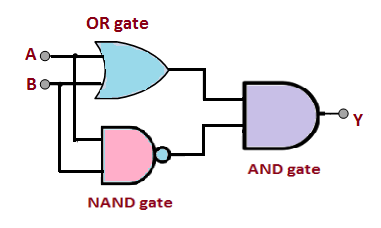

In [15]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

print("x1: 0, x2: 0 =", XOR(0,0))
print("x1: 1, x2: 0 =", XOR(1,0))
print("x1: 0, x2: 1 =", XOR(0,1))
print("x1: 1, x2: 1 =", XOR(1,1))

x1: 0, x2: 0 = 0
x1: 1, x2: 0 = 1
x1: 0, x2: 1 = 1
x1: 1, x2: 1 = 0


* XOR과 같이 층이 여러 개인 퍼셉트론 = **다층 퍼셉트론** <=> 단층 퍼셉트론   

<img src="./img/ch2-2.png" width="400" height="400">

1. 0층의 두 뉴런이 입력 신호를 받아 1층의 뉴런으로 신호를 보낸다.
2. 1층의 뉴런이 2층의 뉴런으로 신호를 보내고, 2층의 뉴런은 y를 출력한다.

##### 2.6 NAND에서 컴퓨터까지
* 단층 퍼셉트론으로 사용하여 다층 퍼셉트론을 만들다 보면 XOR은 물론 가산기, 인코더 등 컴퓨터까지 표현할 수 있다!


##### 2.7 정리